## Deep Learning-Sign Language Digits

## Abstract
### Deep learning is one of the Machine Learning techniques that learns features directly from data.When the amount of data is increased, machine learning techniques are insufficient in terms of performance and deep learning gives better performance like accuracy. Depp Learning also gives better accuracy than Machine Learning when the complexity of the problem also increases like Speech Recognition, Image Classification, Natural Language Processing and so on
### In this project the sign language digits data set is used. There are 2062 image samples with hand signs from 0 to 9 totaling 10 different hand signs present in the dataset.
### The Concepts of Convolutional Neural Networks(CNN) and Artificial Neural Network(ANN) are both implemented here.
### The various parameters of the Deep Learning models in both the CNN and ANN are indeed varied and the accuracy is noted for each case and also how the network plateaus for the particular value and how it is deviated with regards to the network plateau is also noted.



In [1]:
#Importing the necessary libraries
import numpy as np 
import pandas as pd 
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Input, Conv2D, MaxPooling2D, BatchNormalization#For CNN
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
import warnings
# Handle the warnings
warnings.filterwarnings('ignore')
from subprocess import check_output


Using TensorFlow backend.


X shape : (2062, 64, 64)  Y shape: (2062, 10)
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


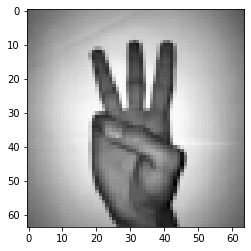

In [2]:
#Loading the Data Set
X = np.load('X.npy')
y = np.load('Y.npy')
print('X shape : {}  Y shape: {}'.format(X.shape, y.shape))

plt.imshow(X[700], cmap='gray')
print(y[700])

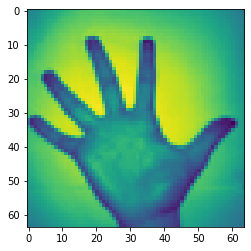

In [3]:
plt.imshow(X[2000]) #Showing a particualr instance of the dataset as to what sign of the image set is present

(-0.5, 63.5, 63.5, -0.5)

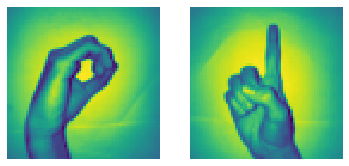

In [4]:
#Reshape the images of the signs 0 and 1 and see it visually
img_size = 64
plt.subplot(1, 2, 1)
plt.imshow(X[260].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(X[900].reshape(img_size, img_size))
plt.axis('off')

In [5]:
#split test and train
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=8)
# add another axis representing grey-scale
Xtest = Xtest[:,:,:,np.newaxis]
Xtrain=Xtrain[:,:,:,np.newaxis]

## CNN(Convolutional Neural Network)
### A Convolutional neural network is a class of deep neural networks,that has one or more Convolutional Layers(a simple filter to an input that results in activation) most commonly applied to analyzing visual imagery. 

### Designing the Convolutional Models. The base model on this analysis is considered as the one where netowrk plateaus as in the accuracy does not increase further with the standard model varying the features like epochs

#### Model 1

In [6]:
#Very first CNN model having the 32 filters with Kernel Size of 5,5 and having an activation funciton of relu and a network initialization of Xavier Uniform
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5, 5), activation='relu', kernel_initializer='glorot_uniform', bias_initializer='zeros'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [7]:
model.compile(loss='categorical_crossentropy',#The model is then compiled and we see that the cost function(loss component is of cross entropy and the gradient estimation of ADA delta is used inititally)
             optimizer='adadelta',
             metrics=['accuracy'])

In [8]:
model.fit(Xtrain, ytrain, batch_size=32, epochs=1)# With an epoch value of 1 the accuracy is 0.09 which is not good 

Train on 1649 samples
1649/1649 [==============================] - 9s 6ms/sample - loss: 2.6168 - accuracy: 0.0934


In [9]:
score = model.evaluate(Xtest, ytest, verbose=0)

In [10]:
print('Loss: {:.4f}  Accuaracy: {:.4}'.format(score[0],score[1]))

Loss: 2.3025  Accuaracy: 0.09685


#### Model 2

In [11]:
model.fit(Xtrain, ytrain, batch_size=32, epochs=2)# General model for computation with epoch=2

Train on 1649 samples
Epoch 1/2
1649/1649 [==============================] - 9s 5ms/sample - loss: 2.4192 - accuracy: 0.1474
Epoch 2/2
1649/1649 [==============================] - 9s 5ms/sample - loss: 2.3110 - accuracy: 0.1747


In [12]:
score = model.evaluate(Xtest, ytest, verbose=0)

In [13]:
print('Loss: {:.4f}  Accuaracy: {:.4}'.format(score[0],score[1]))

Loss: 2.2682  Accuaracy: 0.2082


#### Model 3 
#### Has epoch =3 and the accuracy is still not plateaued

In [14]:
model.fit(Xtrain, ytrain, batch_size=32, epochs=3)

Train on 1649 samples
Epoch 1/3
1649/1649 [==============================] - 9s 5ms/sample - loss: 2.2381 - accuracy: 0.1989
Epoch 2/3
1649/1649 [==============================] - 9s 5ms/sample - loss: 2.1413 - accuracy: 0.2244
Epoch 3/3
1649/1649 [==============================] - 9s 5ms/sample - loss: 2.0554 - accuracy: 0.2662


In [15]:
score = model.evaluate(Xtest, ytest, verbose=0)

In [16]:
print('Loss: {:.4f}  Accuaracy: {:.4}'.format(score[0],score[1]))

Loss: 2.1582  Accuaracy: 0.3971


#### Model 4

In [17]:
model.fit(Xtrain, ytrain, batch_size=32, epochs=4)

Train on 1649 samples
Epoch 1/4
1649/1649 [==============================] - 10s 6ms/sample - loss: 2.0068 - accuracy: 0.2978
Epoch 2/4
1649/1649 [==============================] - 10s 6ms/sample - loss: 1.9096 - accuracy: 0.3451
Epoch 3/4
1649/1649 [==============================] - 10s 6ms/sample - loss: 1.8473 - accuracy: 0.3566
Epoch 4/4
1649/1649 [==============================] - 10s 6ms/sample - loss: 1.7918 - accuracy: 0.3893


In [18]:
score = model.evaluate(Xtest, ytest, verbose=0)

In [19]:
print('Loss: {:.4f}  Accuaracy: {:.4}'.format(score[0],score[1]))

Loss: 1.8359  Accuaracy: 0.5133


#### Model 5

In [20]:
model.fit(Xtrain, ytrain, batch_size=32, epochs=6)

Train on 1649 samples
Epoch 1/6
1649/1649 [==============================] - 10s 6ms/sample - loss: 1.7285 - accuracy: 0.4142
Epoch 2/6
1649/1649 [==============================] - 10s 6ms/sample - loss: 1.6872 - accuracy: 0.4500
Epoch 3/6
1649/1649 [==============================] - 10s 6ms/sample - loss: 1.6474 - accuracy: 0.4536
Epoch 4/6
1649/1649 [==============================] - 10s 6ms/sample - loss: 1.6092 - accuracy: 0.4560
Epoch 5/6
1649/1649 [==============================] - 11s 7ms/sample - loss: 1.5761 - accuracy: 0.4669
Epoch 6/6
1649/1649 [==============================] - 10s 6ms/sample - loss: 1.5095 - accuracy: 0.4985


In [21]:
score = model.evaluate(Xtest, ytest, verbose=0)

In [22]:
print('Loss: {:.4f}  Accuaracy: {:.4}'.format(score[0],score[1]))

Loss: 1.4060  Accuaracy: 0.5981


#### Model 6 (Base Model)
#### This is considered as the based model with an epoch value=10 and also the network plateau is reached as the accuracy does not vary much and is in the range of 0.7 itself when the epochs are increased again

In [23]:
model.fit(Xtrain, ytrain, batch_size=32, epochs=10)

Train on 1649 samples
Epoch 1/10
1649/1649 [==============================] - 11s 6ms/sample - loss: 1.4863 - accuracy: 0.5112
Epoch 2/10
1649/1649 [==============================] - 10s 6ms/sample - loss: 1.4415 - accuracy: 0.5306
Epoch 3/10
1649/1649 [==============================] - 11s 7ms/sample - loss: 1.4131 - accuracy: 0.5367
Epoch 4/10
1649/1649 [==============================] - 12s 7ms/sample - loss: 1.3913 - accuracy: 0.5452
Epoch 5/10
1649/1649 [==============================] - 11s 7ms/sample - loss: 1.3651 - accuracy: 0.5525
Epoch 6/10
1649/1649 [==============================] - 11s 7ms/sample - loss: 1.3167 - accuracy: 0.5706
Epoch 7/10
1649/1649 [==============================] - 11s 7ms/sample - loss: 1.2768 - accuracy: 0.5882
Epoch 8/10
1649/1649 [==============================] - 11s 7ms/sample - loss: 1.2730 - accuracy: 0.5870
Epoch 9/10
1649/1649 [==============================] - 11s 7ms/sample - loss: 1.2319 - accuracy: 0.6010
Epoch 10/10
1649/1649 [==========

In [24]:
score = model.evaluate(Xtest, ytest, verbose=0)

In [25]:
print('Loss: {:.4f}  Accuaracy: {:.4}'.format(score[0],score[1]))

Loss: 1.1324  Accuaracy: 0.6998


#### Model 7
#### Same accuracy almost of 0.7 even with epochs=20 as the one with epoch=10. Designed to verify the network plateau for the model beyond a certain epoch point

In [26]:
model.fit(Xtrain, ytrain, batch_size=32, epochs=20)

Train on 1649 samples
Epoch 1/20
1649/1649 [==============================] - 11s 6ms/sample - loss: 1.1921 - accuracy: 0.6307
Epoch 2/20
1649/1649 [==============================] - 10s 6ms/sample - loss: 1.1589 - accuracy: 0.6301
Epoch 3/20
1649/1649 [==============================] - 10s 6ms/sample - loss: 1.1484 - accuracy: 0.6289
Epoch 4/20
1649/1649 [==============================] - 12s 7ms/sample - loss: 1.1383 - accuracy: 0.6361
Epoch 5/20
1649/1649 [==============================] - 12s 7ms/sample - loss: 1.1181 - accuracy: 0.6574
Epoch 6/20
1649/1649 [==============================] - 11s 7ms/sample - loss: 1.0913 - accuracy: 0.6519
Epoch 7/20
1649/1649 [==============================] - 11s 7ms/sample - loss: 1.0840 - accuracy: 0.6562
Epoch 8/20
1649/1649 [==============================] - 10s 6ms/sample - loss: 1.0502 - accuracy: 0.6562
Epoch 9/20
1649/1649 [==============================] - 10s 6ms/sample - loss: 1.0442 - accuracy: 0.6731
Epoch 10/20
1649/1649 [==========

In [27]:
score = model.evaluate(Xtest, ytest, verbose=0)

In [28]:
print('Loss: {:.4f}  Accuaracy: {:.4}'.format(score[0],score[1]))

Loss: 0.8771  Accuaracy: 0.7312


### Activation Function

### Activation functions are mathematical equations that determine the output of a neural network. The function is attached to each neuron in the network, and determines whether it should be activated (fired) or not, based on whether each neuron's input is relevant for the model's prediction.

#### Model 1
#### Here the activation function is changed to tanh from relu as that was there in the base model

In [33]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5, 5), activation='tanh', kernel_initializer='glorot_uniform', bias_initializer='zeros'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='tanh'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [34]:
model.compile(loss='categorical_crossentropy',
             optimizer='adadelta',
             metrics=['accuracy'])

In [35]:
model.fit(Xtrain, ytrain, batch_size=32, epochs=10)

Train on 1649 samples
Epoch 1/10
1649/1649 [==============================] - 10s 6ms/sample - loss: 2.5208 - accuracy: 0.1516
Epoch 2/10
1649/1649 [==============================] - 10s 6ms/sample - loss: 2.2875 - accuracy: 0.2025
Epoch 3/10
1649/1649 [==============================] - 10s 6ms/sample - loss: 2.0926 - accuracy: 0.2638
Epoch 4/10
1649/1649 [==============================] - 10s 6ms/sample - loss: 1.9721 - accuracy: 0.3129
Epoch 5/10
1649/1649 [==============================] - 11s 7ms/sample - loss: 1.8484 - accuracy: 0.3511
Epoch 6/10
1649/1649 [==============================] - 11s 6ms/sample - loss: 1.7458 - accuracy: 0.4015
Epoch 7/10
1649/1649 [==============================] - 10s 6ms/sample - loss: 1.6551 - accuracy: 0.4336
Epoch 8/10
1649/1649 [==============================] - 11s 7ms/sample - loss: 1.5600 - accuracy: 0.4742
Epoch 9/10
1649/1649 [==============================] - 11s 6ms/sample - loss: 1.4902 - accuracy: 0.4961
Epoch 10/10
1649/1649 [==========

In [36]:
score = model.evaluate(Xtest, ytest, verbose=0)

In [37]:
print('Loss: {:.4f}  Accuaracy: {:.4}'.format(score[0],score[1]))

Loss: 1.3063  Accuaracy: 0.6368


#### The accuracy has decreased by a little bit and also the value of the loss funciton is more than the network palteau model of the base model. It has not reached the network plateau value as that of the base model

#### Model 2
#### Here the elu (Exponential Linear Unit) Activation function is used

In [43]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5, 5), activation='elu', kernel_initializer='glorot_uniform', bias_initializer='zeros'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='elu'),
    tf.keras.layers.Dense(10, activation='elu')
])

In [45]:
model.compile(loss='categorical_crossentropy',
             optimizer='adadelta',
             metrics=['accuracy'])

In [46]:
model.fit(Xtrain, ytrain, batch_size=32, epochs=10)

Train on 1649 samples
Epoch 1/10
1649/1649 [==============================] - 11s 6ms/sample - loss: 6.8742 - accuracy: 0.0995s - loss: 6.8838 - accuracy: 0.09
Epoch 2/10
1649/1649 [==============================] - 11s 7ms/sample - loss: 6.3190 - accuracy: 0.1110
Epoch 3/10
1649/1649 [==============================] - 10s 6ms/sample - loss: 5.7866 - accuracy: 0.1079
Epoch 4/10
1649/1649 [==============================] - 10s 6ms/sample - loss: 5.3379 - accuracy: 0.1213
Epoch 5/10
1649/1649 [==============================] - 11s 7ms/sample - loss: 5.0915 - accuracy: 0.1243
Epoch 6/10
1649/1649 [==============================] - 10s 6ms/sample - loss: 4.5068 - accuracy: 0.1176
Epoch 7/10
1649/1649 [==============================] - 10s 6ms/sample - loss: 4.1948 - accuracy: 0.1413
Epoch 8/10
1649/1649 [==============================] - 11s 7ms/sample - loss: 3.8891 - accuracy: 0.1322
Epoch 9/10
1649/1649 [==============================] - 11s 7ms/sample - loss: 3.7367 - accuracy: 0.1528


In [47]:
score = model.evaluate(Xtest, ytest, verbose=0)

In [48]:
print('Loss: {:.4f}  Accuaracy: {:.4}'.format(score[0],score[1]))

Loss: 2.3718  Accuaracy: 0.1864


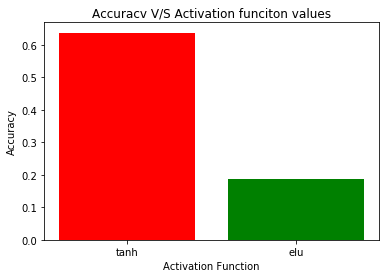

In [126]:
x = ['tanh','elu'] 
# corresponding y axis values 
y = [0.6368,0.1864]  
# plotting the points  
plt.bar(x,y,width = 0.8, color = ['red', 'green']) 
# naming the x axis 
plt.xlabel('Activation Function') 
# naming the y axis 
plt.ylabel('Accuracy') 
  
plt.title('Accuracv V/S Activation funciton values') 
  
# function to show the plot 
plt.show() 

#### The accuracy has decreased drastically and also the value of the loss funciton is more than the network palteau model of the base model. It has not reached the network plateau value as that of the base model

### Cost Function

### Cost function is a function that measures the performance of a Machine Learning model for given data. Cost Function quantifies the error between predicted values and expected values and presents it in the form of a single real number. It is also called cost, loss or error

#### Model 1
#### The model 1 with the loss( cost) of binary_cross_entorpy is used here instead of the categorical cross entropy

In [49]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5, 5), activation='relu', kernel_initializer='glorot_uniform', bias_initializer='zeros'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [50]:
model.compile(loss='binary_crossentropy',
             optimizer='adadelta',
             metrics=['accuracy'])

In [51]:
model.fit(Xtrain, ytrain, batch_size=32, epochs=10)

Train on 1649 samples
Epoch 1/10
1649/1649 [==============================] - 10s 6ms/sample - loss: 0.3600 - accuracy: 0.8976
Epoch 2/10
1649/1649 [==============================] - 11s 6ms/sample - loss: 0.3445 - accuracy: 0.8984
Epoch 3/10
1649/1649 [==============================] - 10s 6ms/sample - loss: 0.3318 - accuracy: 0.8988
Epoch 4/10
1649/1649 [==============================] - 10s 6ms/sample - loss: 0.3260 - accuracy: 0.8988
Epoch 5/10
1649/1649 [==============================] - 10s 6ms/sample - loss: 0.3167 - accuracy: 0.8998
Epoch 6/10
1649/1649 [==============================] - 10s 6ms/sample - loss: 0.3060 - accuracy: 0.9001
Epoch 7/10
1649/1649 [==============================] - 10s 6ms/sample - loss: 0.2998 - accuracy: 0.9001
Epoch 8/10
1649/1649 [==============================] - 10s 6ms/sample - loss: 0.2935 - accuracy: 0.9016
Epoch 9/10
1649/1649 [==============================] - 10s 6ms/sample - loss: 0.2882 - accuracy: 0.9011
Epoch 10/10
1649/1649 [==========

In [52]:
score = model.evaluate(Xtest, ytest, verbose=0)

In [53]:
print('Loss: {:.4f}  Accuaracy: {:.4}'.format(score[0],score[1]))

Loss: 0.2825  Accuaracy: 0.9


#### There is a drastic improvement in the accuracy compared to the base model and the model is better than the network plateaued model as the base model having both ahiger accuracy and also a very low loss rate

#### Model 2
#### Here the hinge loss (cost) function is used

In [54]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5, 5), activation='relu', kernel_initializer='glorot_uniform', bias_initializer='zeros'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [55]:
model.compile(loss='hinge',
             optimizer='adadelta',
             metrics=['accuracy'])

In [56]:
model.fit(Xtrain, ytrain, batch_size=32, epochs=10)

Train on 1649 samples
Epoch 1/10
1649/1649 [==============================] - 11s 7ms/sample - loss: 1.0811 - accuracy: 0.0879
Epoch 2/10
1649/1649 [==============================] - 10s 6ms/sample - loss: 1.0807 - accuracy: 0.0928
Epoch 3/10
1649/1649 [==============================] - 10s 6ms/sample - loss: 1.0804 - accuracy: 0.0958s -
Epoch 4/10
1649/1649 [==============================] - 10s 6ms/sample - loss: 1.0793 - accuracy: 0.1104
Epoch 5/10
1649/1649 [==============================] - 10s 6ms/sample - loss: 1.0793 - accuracy: 0.1037
Epoch 6/10
1649/1649 [==============================] - 11s 7ms/sample - loss: 1.0788 - accuracy: 0.1037
Epoch 7/10
1649/1649 [==============================] - 11s 6ms/sample - loss: 1.0781 - accuracy: 0.1328
Epoch 8/10
1649/1649 [==============================] - 10s 6ms/sample - loss: 1.0778 - accuracy: 0.1231
Epoch 9/10
1649/1649 [==============================] - 10s 6ms/sample - loss: 1.0772 - accuracy: 0.1389
Epoch 10/10
1649/1649 [=======

In [57]:
score = model.evaluate(Xtest, ytest, verbose=0)

In [58]:
print('Loss: {:.4f}  Accuaracy: {:.4}'.format(score[0],score[1]))

Loss: 1.0778  Accuaracy: 0.2131


#### Here there is severe dip in the accuracy of the model and also the in regards to the network plateau model the base model is more accurate and has less loss compared to this model

### Epochs

#### An epoch is a hyperparameter that is specified before training the deep learning model
#### An epoch refers to one cycle through the full training dataset

#### Model 1
#### Here 5 epochs are used with all the other parameters being the same as the base model
 

In [59]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5, 5), activation='relu', kernel_initializer='glorot_uniform', bias_initializer='zeros'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [60]:
model.compile(loss='categorical_crossentropy',
             optimizer='adadelta',
             metrics=['accuracy'])

In [61]:
model.fit(Xtrain, ytrain, batch_size=32, epochs=5)

Train on 1649 samples
Epoch 1/5
1649/1649 [==============================] - 10s 6ms/sample - loss: 2.5269 - accuracy: 0.1122
Epoch 2/5
1649/1649 [==============================] - 10s 6ms/sample - loss: 2.3988 - accuracy: 0.1298
Epoch 3/5
1649/1649 [==============================] - 10s 6ms/sample - loss: 2.2983 - accuracy: 0.1753
Epoch 4/5
1649/1649 [==============================] - 10s 6ms/sample - loss: 2.2376 - accuracy: 0.1977
Epoch 5/5
1649/1649 [==============================] - 11s 7ms/sample - loss: 2.1593 - accuracy: 0.2220


In [62]:
score = model.evaluate(Xtest, ytest, verbose=0)

In [63]:
print('Loss: {:.4f}  Accuaracy: {:.4}'.format(score[0],score[1]))

Loss: 2.2360  Accuaracy: 0.3099


#### Accuracy is low as compared to the absed model and the also with regards the network plateau the base model has less error and better accuracy than the current model

#### Model 2
#### epoch value is set to 25 with all the paraemters same as the base model

In [64]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5, 5), activation='relu', kernel_initializer='glorot_uniform', bias_initializer='zeros'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [65]:
model.compile(loss='categorical_crossentropy',
             optimizer='adadelta',
             metrics=['accuracy'])

In [29]:
model.fit(Xtrain, ytrain, batch_size=32, epochs=25)

Train on 1649 samples
Epoch 1/25
1649/1649 [==============================] - 10s 6ms/sample - loss: 0.9007 - accuracy: 0.7119
Epoch 2/25
1649/1649 [==============================] - 10s 6ms/sample - loss: 0.8809 - accuracy: 0.7216
Epoch 3/25
1649/1649 [==============================] - 10s 6ms/sample - loss: 0.8621 - accuracy: 0.7350
Epoch 4/25
1649/1649 [==============================] - 10s 6ms/sample - loss: 0.8709 - accuracy: 0.7241
Epoch 5/25
1649/1649 [==============================] - 13s 8ms/sample - loss: 0.8562 - accuracy: 0.7247
Epoch 6/25
1649/1649 [==============================] - 12s 7ms/sample - loss: 0.8317 - accuracy: 0.7368
Epoch 7/25
1649/1649 [==============================] - 13s 8ms/sample - loss: 0.8312 - accuracy: 0.7380
Epoch 8/25
1649/1649 [==============================] - 12s 7ms/sample - loss: 0.8207 - accuracy: 0.7447
Epoch 9/25
1649/1649 [==============================] - 12s 7ms/sample - loss: 0.8109 - accuracy: 0.7350
Epoch 10/25
1649/1649 [==========

In [30]:
score = model.evaluate(Xtest, ytest, verbose=0)

In [31]:
print('Loss: {:.4f}  Accuaracy: {:.4}'.format(score[0],score[1]))

Loss: 0.7438  Accuaracy: 0.7651


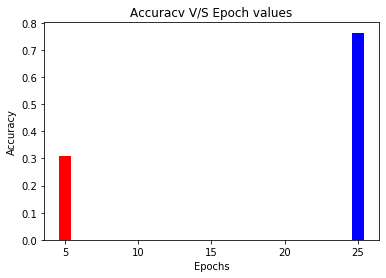

In [127]:
x = [5,25] 
# corresponding y axis values 
y = [0.3099,0.7631]  
# plotting the points  
plt.bar(x,y,width = 0.8, color = ['red', 'blue']) 
# naming the x axis 
plt.xlabel('Epochs') 
# naming the y axis 
plt.ylabel('Accuracy') 
  
plt.title('Accuracv V/S Epoch values') 
  
# function to show the plot 
plt.show() 

#### The accuracy and the loss are almost same as the base model and is as accurate as the base model having the network plateaus

### Gradient Estimation

#### Gradient Estimators mainly involve optimizers that shape and mold the model into its most accurate possible form by futzing with the weights

#### Model 1
#### Here the adam optimizer is used which is chaged from the one used in the base model of adadelta

In [69]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5, 5), activation='relu', kernel_initializer='glorot_uniform', bias_initializer='zeros'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [70]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [71]:
model.fit(Xtrain, ytrain, batch_size=32, epochs=10)

Train on 1649 samples
Epoch 1/10
1649/1649 [==============================] - 11s 7ms/sample - loss: 2.1614 - accuracy: 0.4948
Epoch 2/10
1649/1649 [==============================] - 11s 7ms/sample - loss: 0.5642 - accuracy: 0.8199
Epoch 3/10
1649/1649 [==============================] - 11s 7ms/sample - loss: 0.2741 - accuracy: 0.9133s -
Epoch 4/10
1649/1649 [==============================] - 11s 7ms/sample - loss: 0.1699 - accuracy: 0.9460
Epoch 5/10
1649/1649 [==============================] - 10s 6ms/sample - loss: 0.0964 - accuracy: 0.9673
Epoch 6/10
1649/1649 [==============================] - 10s 6ms/sample - loss: 0.0471 - accuracy: 0.9873s - loss: 0.0440 - accura
Epoch 7/10
1649/1649 [==============================] - 10s 6ms/sample - loss: 0.0363 - accuracy: 0.9897
Epoch 8/10
1649/1649 [==============================] - 10s 6ms/sample - loss: 0.0252 - accuracy: 0.9927
Epoch 9/10
1649/1649 [==============================] - 11s 7ms/sample - loss: 0.0284 - accuracy: 0.9909
Epoch

In [72]:
score = model.evaluate(Xtest, ytest, verbose=0)

In [73]:
print('Loss: {:.4f}  Accuaracy: {:.4}'.format(score[0],score[1]))

Loss: 0.5306  Accuaracy: 0.8232


#### The accuracy has increased with respect to the base model and the loss has decreased and is more accurate than the base model with the network plateaus

#### Model 2
#### The adagrad optimizer is used in this case

In [74]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5, 5), activation='relu', kernel_initializer='glorot_uniform', bias_initializer='zeros'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


In [75]:
model.compile(loss='categorical_crossentropy',
             optimizer='adagrad',
             metrics=['accuracy'])

In [76]:
model.fit(Xtrain, ytrain, batch_size=32, epochs=10)

Train on 1649 samples
Epoch 1/10
1649/1649 [==============================] - 12s 7ms/sample - loss: 1.7555 - accuracy: 0.5421
Epoch 2/10
1649/1649 [==============================] - 12s 7ms/sample - loss: 0.4867 - accuracy: 0.8490
Epoch 3/10
1649/1649 [==============================] - 12s 7ms/sample - loss: 0.2786 - accuracy: 0.9193
Epoch 4/10
1649/1649 [==============================] - 14s 9ms/sample - loss: 0.1652 - accuracy: 0.9654
Epoch 5/10
1649/1649 [==============================] - 15s 9ms/sample - loss: 0.1154 - accuracy: 0.9782
Epoch 6/10
1649/1649 [==============================] - 12s 8ms/sample - loss: 0.0701 - accuracy: 0.9921
Epoch 7/10
1649/1649 [==============================] - 11s 7ms/sample - loss: 0.0499 - accuracy: 0.9939
Epoch 8/10
1649/1649 [==============================] - 11s 7ms/sample - loss: 0.0350 - accuracy: 0.9982
Epoch 9/10
1649/1649 [==============================] - 11s 7ms/sample - loss: 0.0257 - accuracy: 1.0000
Epoch 10/10
1649/1649 [==========

In [77]:
score = model.evaluate(Xtest, ytest, verbose=0)

In [78]:
print('Loss: {:.4f}  Accuaracy: {:.4}'.format(score[0],score[1]))

Loss: 0.5232  Accuaracy: 0.8571


#### The accuracy has increased with respect to the base model and the loss has decreased and is more accurate than the base model with the network plateaus

### Network Architecture

#### Deep Learning refers to a neural network architecture with a relatively large number of layers, in which the first several layers mostly extract significant features from the data, and the last layers are mostly engaged in correlating the extracted features to outputs

#### Model 1 
#### This has an extra layer with the same kernel size and features as the base model

In [79]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5, 5), activation='relu', kernel_initializer='glorot_uniform', bias_initializer='zeros'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (5, 5), activation='relu', kernel_initializer='glorot_uniform', bias_initializer='zeros'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


In [80]:
model.compile(loss='categorical_crossentropy',
             optimizer='adagrad',
             metrics=['accuracy'])

In [81]:
model.fit(Xtrain, ytrain, batch_size=32, epochs=10)

Train on 1649 samples
Epoch 1/10
1649/1649 [==============================] - 12s 7ms/sample - loss: 1.7840 - accuracy: 0.5434
Epoch 2/10
1649/1649 [==============================] - 11s 6ms/sample - loss: 0.6496 - accuracy: 0.7853
Epoch 3/10
1649/1649 [==============================] - 10s 6ms/sample - loss: 0.4618 - accuracy: 0.8405
Epoch 4/10
1649/1649 [==============================] - 11s 7ms/sample - loss: 0.3691 - accuracy: 0.8811
Epoch 5/10
1649/1649 [==============================] - 10s 6ms/sample - loss: 0.3020 - accuracy: 0.9030
Epoch 6/10
1649/1649 [==============================] - 11s 6ms/sample - loss: 0.2373 - accuracy: 0.9357
Epoch 7/10
1649/1649 [==============================] - 11s 7ms/sample - loss: 0.2144 - accuracy: 0.9327
Epoch 8/10
1649/1649 [==============================] - 11s 7ms/sample - loss: 0.1873 - accuracy: 0.9454
Epoch 9/10
1649/1649 [==============================] - 11s 6ms/sample - loss: 0.1693 - accuracy: 0.9509
Epoch 10/10
1649/1649 [==========

In [82]:
score = model.evaluate(Xtest, ytest, verbose=0)

In [83]:
print('Loss: {:.4f}  Accuaracy: {:.4}'.format(score[0],score[1]))

Loss: 0.5058  Accuaracy: 0.8547


#### The accuracy has increased with respect to the base model and the loss has decreased and is more accurate than the base model with the network plateaus

#### Model 2
#### Here an extra layer is added and the number of layers and the size both are varied compared to the base model

In [84]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5, 5), activation='relu', kernel_initializer='glorot_uniform', bias_initializer='zeros'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (5, 5), activation='relu', kernel_initializer='glorot_uniform', bias_initializer='zeros'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (5, 5), activation='relu', kernel_initializer='glorot_uniform', bias_initializer='zeros'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [85]:
model.compile(loss='categorical_crossentropy',
             optimizer='adagrad',
             metrics=['accuracy'])

In [86]:
model.fit(Xtrain, ytrain, batch_size=32, epochs=10)

Train on 1649 samples
Epoch 1/10
1649/1649 [==============================] - 13s 8ms/sample - loss: 1.7418 - accuracy: 0.4857
Epoch 2/10
1649/1649 [==============================] - 13s 8ms/sample - loss: 0.8370 - accuracy: 0.7198
Epoch 3/10
1649/1649 [==============================] - 10s 6ms/sample - loss: 0.6285 - accuracy: 0.7908
Epoch 4/10
1649/1649 [==============================] - 10s 6ms/sample - loss: 0.5204 - accuracy: 0.8326
Epoch 5/10
1649/1649 [==============================] - 10s 6ms/sample - loss: 0.4316 - accuracy: 0.8617
Epoch 6/10
1649/1649 [==============================] - 10s 6ms/sample - loss: 0.3854 - accuracy: 0.8805
Epoch 7/10
1649/1649 [==============================] - 11s 7ms/sample - loss: 0.3691 - accuracy: 0.8696
Epoch 8/10
1649/1649 [==============================] - 11s 7ms/sample - loss: 0.3230 - accuracy: 0.8914
Epoch 9/10
1649/1649 [==============================] - 11s 6ms/sample - loss: 0.2894 - accuracy: 0.9090
Epoch 10/10
1649/1649 [==========

In [87]:
score = model.evaluate(Xtest, ytest, verbose=0)

In [88]:
print('Loss: {:.4f}  Accuaracy: {:.4}'.format(score[0],score[1]))

Loss: 0.6293  Accuaracy: 0.8136


#### The accuracy has increased with respect to the base model and the loss has decreased and is more accurate than the base model with the network plateaus

### Network Initialization

#### Network Initialization is also known as the kernel intialization wherein we intitalize small numbers to the neural netwrok model

#### Model 1 having unfiorm intializer

In [89]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5, 5), activation='relu', kernel_initializer='uniform', bias_initializer='zeros'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [90]:
model.compile(loss='categorical_crossentropy',
             optimizer='adagrad',
             metrics=['accuracy'])

In [91]:
model.fit(Xtrain, ytrain, batch_size=32, epochs=10)

Train on 1649 samples
Epoch 1/10
1649/1649 [==============================] - 13s 8ms/sample - loss: 1.3665 - accuracy: 0.5785
Epoch 2/10
1649/1649 [==============================] - 13s 8ms/sample - loss: 0.4190 - accuracy: 0.8684
Epoch 3/10
1649/1649 [==============================] - 12s 7ms/sample - loss: 0.2383 - accuracy: 0.9351
Epoch 4/10
1649/1649 [==============================] - 11s 7ms/sample - loss: 0.1463 - accuracy: 0.9654
Epoch 5/10
1649/1649 [==============================] - 12s 7ms/sample - loss: 0.0944 - accuracy: 0.9818
Epoch 6/10
1649/1649 [==============================] - 12s 7ms/sample - loss: 0.0648 - accuracy: 0.9909
Epoch 7/10
1649/1649 [==============================] - 11s 7ms/sample - loss: 0.0437 - accuracy: 0.9945
Epoch 8/10
1649/1649 [==============================] - 11s 7ms/sample - loss: 0.0302 - accuracy: 0.9988
Epoch 9/10
1649/1649 [==============================] - 11s 7ms/sample - loss: 0.0248 - accuracy: 0.9982
Epoch 10/10
1649/1649 [==========

In [92]:
score = model.evaluate(Xtest, ytest, verbose=0)

In [93]:
print('Loss: {:.4f}  Accuaracy: {:.4}'.format(score[0],score[1]))

Loss: 0.4613  Accuaracy: 0.8789


#### The accuracy has increased with respect to the base model and the loss has decreased and is more accurate than the base model with the network plateaus

#### Model 2 having the he_normal initializer

In [94]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5, 5), activation='relu', kernel_initializer='he_normal', bias_initializer='zeros'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [95]:
model.compile(loss='categorical_crossentropy',
             optimizer='adagrad',
             metrics=['accuracy'])

In [96]:
model.fit(Xtrain, ytrain, batch_size=32, epochs=10)

Train on 1649 samples
Epoch 1/10
1649/1649 [==============================] - 12s 7ms/sample - loss: 3.2423 - accuracy: 0.5112
Epoch 2/10
1649/1649 [==============================] - 11s 7ms/sample - loss: 0.5679 - accuracy: 0.8187
Epoch 3/10
1649/1649 [==============================] - 11s 7ms/sample - loss: 0.3368 - accuracy: 0.9066
Epoch 4/10
1649/1649 [==============================] - 11s 7ms/sample - loss: 0.2231 - accuracy: 0.9394
Epoch 5/10
1649/1649 [==============================] - 12s 7ms/sample - loss: 0.1785 - accuracy: 0.9563
Epoch 6/10
1649/1649 [==============================] - 11s 7ms/sample - loss: 0.1240 - accuracy: 0.9739
Epoch 7/10
1649/1649 [==============================] - 11s 7ms/sample - loss: 0.0969 - accuracy: 0.9836
Epoch 8/10
1649/1649 [==============================] - 11s 7ms/sample - loss: 0.0776 - accuracy: 0.9873
Epoch 9/10
1649/1649 [==============================] - 12s 7ms/sample - loss: 0.0600 - accuracy: 0.9951
Epoch 10/10
1649/1649 [==========

In [97]:
score = model.evaluate(Xtest, ytest, verbose=0)

In [98]:
print('Loss: {:.4f}  Accuaracy: {:.4}'.format(score[0],score[1]))

Loss: 0.5284  Accuaracy: 0.8354


#### The accuracy has increased with respect to the base model and the loss has decreased and is more accurate than the base model with the network plateaus

### Artificial Neural Network (ANN)

### Artificial Neural Networks (ANN) are multi-layer fully-connected neural networks that consist of an input layer, multiple hidden layers, and an output layer. They are similar to the human neurons(interconnected brain cells)

In [99]:
# Join a sequence of arrays along an row axis.
x1 = np.concatenate((X[204:409], X[822:1027] ), axis=0) # from 0 to 204 is zero sign and from 205 to 410 is one sign 
z = np.zeros(205)
o = np.ones(205)
y1 = np.concatenate((z, o), axis=0).reshape(x1.shape[0],1)
print("X shape: " , x1.shape)
print("Y shape: " , y1.shape)

X shape:  (410, 64, 64)
Y shape:  (410, 1)


In [100]:
# create x_train, y_train, x_test, y_test arrays
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x1, y1, test_size=0.15, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

In [101]:
# Flatten and reshape the arrays and give it to ANN due to the dimensionality constraint as opposed to CNN
X_train_flatten = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test .reshape(number_of_test,X_test.shape[1]*X_test.shape[2])
print("X train flatten",X_train_flatten.shape)
print("X test flatten",X_test_flatten.shape)

X train flatten (348, 4096)
X test flatten (62, 4096)


In [102]:
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (4096, 348)
x test:  (4096, 62)
y train:  (1, 348)
y test:  (1, 62)


In [103]:
# Reshaping The transformed data
x_train, x_test, y_train, y_test = x_train.T, x_test.T, y_train.T, y_test.T

#### Model 1

In [104]:
# Evaluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library specify the number of layers needed through Dense's units field
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))# Units is the size of each layer and .add method is used to add every layer to the model
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 10)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))

Epoch 1/10
232/232 [==============================] - 0s 480us/step - loss: 0.6931 - accuracy: 0.5172
Epoch 2/10
232/232 [==============================] - 0s 80us/step - loss: 0.6925 - accuracy: 0.5431
Epoch 3/10
232/232 [==============================] - 0s 80us/step - loss: 0.6919 - accuracy: 0.5431
Epoch 4/10
232/232 [==============================] - 0s 72us/step - loss: 0.6914 - accuracy: 0.5431
Epoch 5/10
232/232 [==============================] - 0s 84us/step - loss: 0.6907 - accuracy: 0.5431
Epoch 6/10
232/232 [==============================] - 0s 67us/step - loss: 0.6904 - accuracy: 0.5431
Epoch 7/10
232/232 [==============================] - 0s 63us/step - loss: 0.6892 - accuracy: 0.5431
Epoch 8/10
232/232 [==============================] - 0s 72us/step - loss: 0.6885 - accuracy: 0.5431
Epoch 9/10
232/232 [==============================] - 0s 56us/step - loss: 0.6877 - accuracy: 0.5431
Epoch 10/10
116/116 [==============================] - 0s 286us/step
Epoch 1/10
232/232 [=

#### Model 2

In [105]:
# Evaluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library specify the number of layers needed through Dense's units field
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 15)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))

Epoch 1/15
232/232 [==============================] - 0s 625us/step - loss: 0.6933 - accuracy: 0.4914
Epoch 2/15
232/232 [==============================] - 0s 65us/step - loss: 0.6929 - accuracy: 0.5431
Epoch 3/15
232/232 [==============================] - 0s 80us/step - loss: 0.6926 - accuracy: 0.5431
Epoch 4/15
232/232 [==============================] - 0s 80us/step - loss: 0.6925 - accuracy: 0.5431
Epoch 5/15
232/232 [==============================] - 0s 76us/step - loss: 0.6924 - accuracy: 0.5431
Epoch 6/15
232/232 [==============================] - 0s 67us/step - loss: 0.6923 - accuracy: 0.5431
Epoch 7/15
232/232 [==============================] - 0s 76us/step - loss: 0.6922 - accuracy: 0.5431
Epoch 8/15
232/232 [==============================] - 0s 67us/step - loss: 0.6921 - accuracy: 0.5431
Epoch 9/15
232/232 [==============================] - 0s 76us/step - loss: 0.6919 - accuracy: 0.5431
Epoch 10/15
232/232 [==============================] - 0s 72us/step - loss: 0.6918 - accur

#### Model 3 (Base Model) and also has the network plateau reached with an epoch value of 25 and beyon which the accuracy reamins the same

In [106]:
# Evaluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library specify the number of layers needed through Dense's units field
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 25)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))

Epoch 1/25
232/232 [==============================] - 0s 461us/step - loss: 0.6931 - accuracy: 0.4914
Epoch 2/25
232/232 [==============================] - 0s 69us/step - loss: 0.6928 - accuracy: 0.5948
Epoch 3/25
232/232 [==============================] - 0s 72us/step - loss: 0.6927 - accuracy: 0.7672
Epoch 4/25
232/232 [==============================] - 0s 76us/step - loss: 0.6921 - accuracy: 0.6164
Epoch 5/25
232/232 [==============================] - 0s 67us/step - loss: 0.6912 - accuracy: 0.6853
Epoch 6/25
232/232 [==============================] - 0s 80us/step - loss: 0.6898 - accuracy: 0.8491
Epoch 7/25
232/232 [==============================] - 0s 76us/step - loss: 0.6871 - accuracy: 0.7457
Epoch 8/25
232/232 [==============================] - 0s 76us/step - loss: 0.6823 - accuracy: 0.8190
Epoch 9/25
232/232 [==============================] - 0s 72us/step - loss: 0.6792 - accuracy: 0.5603
Epoch 10/25
232/232 [==============================] - 0s 72us/step - loss: 0.6705 - accur

### Activation Function

#### Model 1 
#### Here the activation function si cahged to elu

In [107]:
# Evaluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library specify the number of layers needed through Dense's units field
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'elu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'elu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'elu'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 25)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))

Epoch 1/25
232/232 [==============================] - 0s 445us/step - loss: 2.2296 - accuracy: 0.4569
Epoch 2/25
232/232 [==============================] - 0s 63us/step - loss: 1.6027 - accuracy: 0.4569
Epoch 3/25
232/232 [==============================] - 0s 76us/step - loss: 1.3018 - accuracy: 0.4569
Epoch 4/25
232/232 [==============================] - 0s 67us/step - loss: 1.0678 - accuracy: 0.4569
Epoch 5/25
232/232 [==============================] - 0s 80us/step - loss: 0.8742 - accuracy: 0.4569
Epoch 6/25
232/232 [==============================] - 0s 67us/step - loss: 0.7547 - accuracy: 0.4569
Epoch 7/25
232/232 [==============================] - 0s 75us/step - loss: 0.7012 - accuracy: 0.4655
Epoch 8/25
232/232 [==============================] - 0s 67us/step - loss: 0.6926 - accuracy: 0.5431
Epoch 9/25
232/232 [==============================] - 0s 59us/step - loss: 0.6932 - accuracy: 0.5388
Epoch 10/25
232/232 [==============================] - 0s 72us/step - loss: 0.6902 - accur

#### The accuracy of the model has decreased drastically and the accuray fo the network plateaus base model is much better

#### Model 2

In [108]:
# Evaluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library specify the number of layers needed through Dense's units field
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'tanh', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'tanh'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'tanh'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 25)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))

Epoch 1/25
232/232 [==============================] - 0s 477us/step - loss: 2.7045 - accuracy: 0.4569
Epoch 2/25
232/232 [==============================] - 0s 63us/step - loss: 1.9663 - accuracy: 0.4569
Epoch 3/25
232/232 [==============================] - 0s 88us/step - loss: 1.7899 - accuracy: 0.4569
Epoch 4/25
232/232 [==============================] - 0s 76us/step - loss: 1.6611 - accuracy: 0.4569
Epoch 5/25
232/232 [==============================] - 0s 84us/step - loss: 1.5498 - accuracy: 0.4569
Epoch 6/25
232/232 [==============================] - 0s 88us/step - loss: 1.4545 - accuracy: 0.4569
Epoch 7/25
232/232 [==============================] - 0s 84us/step - loss: 1.3793 - accuracy: 0.4569
Epoch 8/25
232/232 [==============================] - 0s 84us/step - loss: 1.3089 - accuracy: 0.4569
Epoch 9/25
232/232 [==============================] - 0s 88us/step - loss: 1.2493 - accuracy: 0.4569
Epoch 10/25
232/232 [==============================] - 0s 80us/step - loss: 1.1950 - accur

#### The accuracy of the model has decreased drastically and the accuray fo the network plateaus base model is much better

### Cost Function

#### Model 1
#### The hinge loss (cost) function is used in this case

In [109]:
# Evaluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library specify the number of layers needed through Dense's units field
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 25)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))

Epoch 1/25
232/232 [==============================] - 0s 964us/step - loss: 0.9569 - accuracy: 0.4741
Epoch 2/25
232/232 [==============================] - 0s 84us/step - loss: 0.9568 - accuracy: 0.5431
Epoch 3/25
232/232 [==============================] - 0s 80us/step - loss: 0.9567 - accuracy: 0.5431
Epoch 4/25
232/232 [==============================] - 0s 88us/step - loss: 0.9565 - accuracy: 0.5431
Epoch 5/25
232/232 [==============================] - 0s 89us/step - loss: 0.9561 - accuracy: 0.5431
Epoch 6/25
232/232 [==============================] - 0s 72us/step - loss: 0.9553 - accuracy: 0.5431
Epoch 7/25
232/232 [==============================] - 0s 76us/step - loss: 0.9541 - accuracy: 0.5431
Epoch 8/25
232/232 [==============================] - 0s 80us/step - loss: 0.9519 - accuracy: 0.5431
Epoch 9/25
232/232 [==============================] - 0s 76us/step - loss: 0.9498 - accuracy: 0.5431
Epoch 10/25
232/232 [==============================] - 0s 74us/step - loss: 0.9452 - accur

#### The accuracy of the model has decreased drastically and the accuray fo the network plateaus base model is much better

#### Model 2

In [110]:
# Evaluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library specify the number of layers needed through Dense's units field
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'kullback_leibler_divergence', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 25)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))

Epoch 1/25
232/232 [==============================] - 0s 446us/step - loss: 0.3756 - accuracy: 0.5517
Epoch 2/25
232/232 [==============================] - 0s 67us/step - loss: 0.3734 - accuracy: 0.5431
Epoch 3/25
232/232 [==============================] - 0s 63us/step - loss: 0.3712 - accuracy: 0.5431
Epoch 4/25
232/232 [==============================] - 0s 80us/step - loss: 0.3689 - accuracy: 0.5431
Epoch 5/25
232/232 [==============================] - 0s 72us/step - loss: 0.3666 - accuracy: 0.5431
Epoch 6/25
232/232 [==============================] - 0s 84us/step - loss: 0.3642 - accuracy: 0.5431
Epoch 7/25
232/232 [==============================] - 0s 80us/step - loss: 0.3618 - accuracy: 0.5431
Epoch 8/25
232/232 [==============================] - 0s 76us/step - loss: 0.3595 - accuracy: 0.5431
Epoch 9/25
232/232 [==============================] - 0s 80us/step - loss: 0.3570 - accuracy: 0.5431
Epoch 10/25
232/232 [==============================] - 0s 84us/step - loss: 0.3544 - accur

#### The accuracy of the model has decreased drastically and the accuray fo the network plateaus base model is much better

### Epochs

#### Model 1
#### The epoch value is varied to 3

In [111]:
# Evaluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library specify the number of layers needed through Dense's units field
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 5)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))

Epoch 1/5
232/232 [==============================] - 0s 438us/step - loss: 0.6910 - accuracy: 0.5431
Epoch 2/5
232/232 [==============================] - 0s 72us/step - loss: 0.6876 - accuracy: 0.5431
Epoch 3/5
232/232 [==============================] - 0s 84us/step - loss: 0.6852 - accuracy: 0.5431
Epoch 4/5
232/232 [==============================] - 0s 88us/step - loss: 0.6843 - accuracy: 0.5431
Epoch 5/5
116/116 [==============================] - 0s 168us/step
Epoch 1/5
232/232 [==============================] - 0s 480us/step - loss: 0.6944 - accuracy: 0.4784
Epoch 2/5
232/232 [==============================] - 0s 73us/step - loss: 0.6928 - accuracy: 0.5603
Epoch 3/5
232/232 [==============================] - 0s 78us/step - loss: 0.6918 - accuracy: 0.4784
Epoch 4/5
232/232 [==============================] - 0s 80us/step - loss: 0.6916 - accuracy: 0.4784
Epoch 5/5
116/116 [==============================] - 0s 164us/step
Epoch 1/5
232/232 [==============================] - 0s 506us/st

#### The accuracy of the model has decreased drastically and the accuray fo the network plateaus base model is much better

#### Model 2
#### The epoch value is set to 30

In [112]:
# Evaluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library specify the number of layers needed through Dense's units field
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 30)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))

Epoch 1/30
232/232 [==============================] - 0s 587us/step - loss: 0.6932 - accuracy: 0.5129
Epoch 2/30
232/232 [==============================] - 0s 67us/step - loss: 0.6930 - accuracy: 0.5431
Epoch 3/30
232/232 [==============================] - 0s 76us/step - loss: 0.6930 - accuracy: 0.5431
Epoch 4/30
232/232 [==============================] - 0s 76us/step - loss: 0.6929 - accuracy: 0.5431
Epoch 5/30
232/232 [==============================] - 0s 72us/step - loss: 0.6928 - accuracy: 0.5431
Epoch 6/30
232/232 [==============================] - 0s 80us/step - loss: 0.6927 - accuracy: 0.5431
Epoch 7/30
232/232 [==============================] - 0s 72us/step - loss: 0.6925 - accuracy: 0.5431
Epoch 8/30
232/232 [==============================] - 0s 72us/step - loss: 0.6924 - accuracy: 0.5431
Epoch 9/30
232/232 [==============================] - 0s 65us/step - loss: 0.6923 - accuracy: 0.5431
Epoch 10/30
232/232 [==============================] - 0s 80us/step - loss: 0.6922 - accur

#### The accuracy is almost same as the base model and with the increase in the epochs the accuracy is still plateaued in the same range

### Gradient Estimation

#### Model 1
#### Changing the optimizer to adadelta

In [113]:
# Evaluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library specify the number of layers needed through Dense's units field
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adadelta', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 25)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))

Epoch 1/25
232/232 [==============================] - 0s 488us/step - loss: 0.6928 - accuracy: 0.5259
Epoch 2/25
232/232 [==============================] - 0s 80us/step - loss: 0.6912 - accuracy: 0.5431
Epoch 3/25
232/232 [==============================] - 0s 80us/step - loss: 0.6887 - accuracy: 0.5431
Epoch 4/25
232/232 [==============================] - 0s 72us/step - loss: 0.6878 - accuracy: 0.5431
Epoch 5/25
232/232 [==============================] - 0s 84us/step - loss: 0.6867 - accuracy: 0.5431
Epoch 6/25
232/232 [==============================] - 0s 84us/step - loss: 0.6805 - accuracy: 0.5431
Epoch 7/25
232/232 [==============================] - 0s 84us/step - loss: 0.6711 - accuracy: 0.5431
Epoch 8/25
232/232 [==============================] - 0s 97us/step - loss: 0.6643 - accuracy: 0.5431
Epoch 9/25
232/232 [==============================] - 0s 93us/step - loss: 0.6864 - accuracy: 0.5431
Epoch 10/25
232/232 [==============================] - 0s 67us/step - loss: 0.6848 - accur

#### The accuracy of the model has decreased drastically and the accuray fo the network plateaus base model is much better

#### Model 2
#### The optimizer used is adagrad

In [114]:
# Evaluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library specify the number of layers needed through Dense's units field
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adagrad', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 25)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))

Epoch 1/25
232/232 [==============================] - 0s 358us/step - loss: 0.6898 - accuracy: 0.5690
Epoch 2/25
232/232 [==============================] - 0s 63us/step - loss: 0.6879 - accuracy: 0.5431
Epoch 3/25
232/232 [==============================] - 0s 72us/step - loss: 0.6847 - accuracy: 0.5431
Epoch 4/25
232/232 [==============================] - 0s 63us/step - loss: 0.6836 - accuracy: 0.5431
Epoch 5/25
232/232 [==============================] - 0s 76us/step - loss: 0.6801 - accuracy: 0.5431
Epoch 6/25
232/232 [==============================] - 0s 59us/step - loss: 0.6769 - accuracy: 0.5431
Epoch 7/25
232/232 [==============================] - 0s 72us/step - loss: 0.6747 - accuracy: 0.5431
Epoch 8/25
232/232 [==============================] - 0s 63us/step - loss: 0.6697 - accuracy: 0.5431
Epoch 9/25
232/232 [==============================] - 0s 72us/step - loss: 0.6637 - accuracy: 0.5474
Epoch 10/25
232/232 [==============================] - 0s 63us/step - loss: 0.6573 - accur

#### The accuracy of the model has decreased drastically and the accuray fo the network plateaus base model is much better

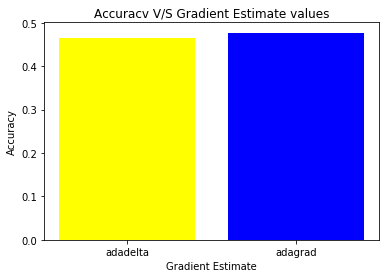

In [129]:
x = ['adadelta','adagrad'] 
# corresponding y axis values 
y = [0.465,0.477]  
# plotting the points  
plt.bar(x,y,width = 0.8, color = ['yellow', 'blue']) 
# naming the x axis 
plt.xlabel('Gradient Estimate') 
# naming the y axis 
plt.ylabel('Accuracy') 
  
plt.title('Accuracv V/S Gradient Estimate values') 
  
# function to show the plot 
plt.show() 

### Network Architecture

#### Model 1
#### A layer has been removed from the base model

In [115]:
# Evaluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library specify the number of layers needed through Dense's units field
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 25)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))

Epoch 1/25
232/232 [==============================] - 0s 454us/step - loss: 0.6944 - accuracy: 0.5000
Epoch 2/25
232/232 [==============================] - 0s 59us/step - loss: 0.6930 - accuracy: 0.5431
Epoch 3/25
232/232 [==============================] - 0s 72us/step - loss: 0.6927 - accuracy: 0.5431
Epoch 4/25
232/232 [==============================] - 0s 72us/step - loss: 0.6926 - accuracy: 0.5431
Epoch 5/25
232/232 [==============================] - 0s 67us/step - loss: 0.6924 - accuracy: 0.5431
Epoch 6/25
232/232 [==============================] - 0s 67us/step - loss: 0.6922 - accuracy: 0.5431
Epoch 7/25
232/232 [==============================] - 0s 76us/step - loss: 0.6921 - accuracy: 0.5431
Epoch 8/25
232/232 [==============================] - 0s 72us/step - loss: 0.6920 - accuracy: 0.5431
Epoch 9/25
232/232 [==============================] - 0s 76us/step - loss: 0.6918 - accuracy: 0.5431
Epoch 10/25
232/232 [==============================] - 0s 65us/step - loss: 0.6917 - accur

#### The accuracy of the model has decreased drastically and the accuray fo the network plateaus base model is much better

#### Model 2
#### The size of the input has been varied in this case

In [116]:
# Evaluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library specify the number of layers needed through Dense's units field
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 30)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))

Epoch 1/30
232/232 [==============================] - 0s 484us/step - loss: 0.6932 - accuracy: 0.5086
Epoch 2/30
232/232 [==============================] - 0s 76us/step - loss: 0.6930 - accuracy: 0.5431
Epoch 3/30
232/232 [==============================] - 0s 72us/step - loss: 0.6929 - accuracy: 0.5431
Epoch 4/30
232/232 [==============================] - 0s 76us/step - loss: 0.6927 - accuracy: 0.5431
Epoch 5/30
232/232 [==============================] - 0s 59us/step - loss: 0.6926 - accuracy: 0.5431
Epoch 6/30
232/232 [==============================] - 0s 72us/step - loss: 0.6925 - accuracy: 0.5431
Epoch 7/30
232/232 [==============================] - 0s 76us/step - loss: 0.6924 - accuracy: 0.5431
Epoch 8/30
232/232 [==============================] - 0s 72us/step - loss: 0.6923 - accuracy: 0.5431
Epoch 9/30
232/232 [==============================] - 0s 67us/step - loss: 0.6921 - accuracy: 0.5431
Epoch 10/30
232/232 [==============================] - 0s 76us/step - loss: 0.6920 - accur

### Network Initialization

#### Model 1
#### The Xavier Uniform Kernel is used

In [117]:
# Evaluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library specify the number of layers needed through Dense's units field
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'glorot_uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 4, kernel_initializer = 'glorot_uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 25)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))

Epoch 1/25
232/232 [==============================] - 0s 511us/step - loss: 0.6987 - accuracy: 0.5431
Epoch 2/25
232/232 [==============================] - 0s 97us/step - loss: 0.6898 - accuracy: 0.5431
Epoch 3/25
232/232 [==============================] - 0s 76us/step - loss: 0.6881 - accuracy: 0.5431
Epoch 4/25
232/232 [==============================] - 0s 88us/step - loss: 0.6874 - accuracy: 0.5431
Epoch 5/25
232/232 [==============================] - 0s 86us/step - loss: 0.6865 - accuracy: 0.5431
Epoch 6/25
232/232 [==============================] - 0s 97us/step - loss: 0.6853 - accuracy: 0.5431
Epoch 7/25
232/232 [==============================] - 0s 84us/step - loss: 0.6843 - accuracy: 0.5431
Epoch 8/25
232/232 [==============================] - 0s 80us/step - loss: 0.6827 - accuracy: 0.5431
Epoch 9/25
232/232 [==============================] - 0s 80us/step - loss: 0.6808 - accuracy: 0.5431
Epoch 10/25
232/232 [==============================] - 0s 77us/step - loss: 0.6786 - accur

#### The accuracy of the model has decreased and the accuray fo the network plateaus base model is much better

#### Model 2
#### The random Uniform Kernel is used

In [118]:
# Evaluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library specify the number of layers needed through Dense's units field
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'random_uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 4, kernel_initializer = 'random_uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'random_uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 25)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))

Epoch 1/25
232/232 [==============================] - 0s 509us/step - loss: 0.6930 - accuracy: 0.5345
Epoch 2/25
232/232 [==============================] - 0s 67us/step - loss: 0.6927 - accuracy: 0.5560
Epoch 3/25
232/232 [==============================] - 0s 67us/step - loss: 0.6920 - accuracy: 0.5431
Epoch 4/25
232/232 [==============================] - 0s 76us/step - loss: 0.6914 - accuracy: 0.6509
Epoch 5/25
232/232 [==============================] - 0s 63us/step - loss: 0.6897 - accuracy: 0.5517
Epoch 6/25
232/232 [==============================] - 0s 76us/step - loss: 0.6887 - accuracy: 0.5474
Epoch 7/25
232/232 [==============================] - 0s 67us/step - loss: 0.6859 - accuracy: 0.8750
Epoch 8/25
232/232 [==============================] - 0s 67us/step - loss: 0.6799 - accuracy: 0.5560
Epoch 9/25
232/232 [==============================] - 0s 67us/step - loss: 0.6741 - accuracy: 0.7543
Epoch 10/25
232/232 [==============================] - 0s 67us/step - loss: 0.6658 - accur

#### The accuracy is almost same as the base model and the netowrk plateaus models accuracy too comapred almost equally with this model

#### Model 3
#### The he_normal kernel initializer is used

In [119]:
# Evaluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library specify the number of layers needed through Dense's units field
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'he_normal', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 4, kernel_initializer = 'he_normal', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'he_normal', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 25)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))

Epoch 1/25
232/232 [==============================] - 0s 466us/step - loss: 0.6907 - accuracy: 0.5431
Epoch 2/25
232/232 [==============================] - 0s 67us/step - loss: 0.6929 - accuracy: 0.5431
Epoch 3/25
232/232 [==============================] - 0s 74us/step - loss: 0.6927 - accuracy: 0.5431
Epoch 4/25
232/232 [==============================] - 0s 76us/step - loss: 0.6926 - accuracy: 0.5431
Epoch 5/25
232/232 [==============================] - 0s 67us/step - loss: 0.6924 - accuracy: 0.5431
Epoch 6/25
232/232 [==============================] - 0s 76us/step - loss: 0.6923 - accuracy: 0.5431
Epoch 7/25
232/232 [==============================] - 0s 76us/step - loss: 0.6922 - accuracy: 0.5431
Epoch 8/25
232/232 [==============================] - 0s 76us/step - loss: 0.6921 - accuracy: 0.5431
Epoch 9/25
232/232 [==============================] - 0s 76us/step - loss: 0.6921 - accuracy: 0.5431
Epoch 10/25
232/232 [==============================] - 0s 76us/step - loss: 0.6920 - accur

#### The accuracy of the model has decreased drastically and the accuray fo the network plateaus base model is much better

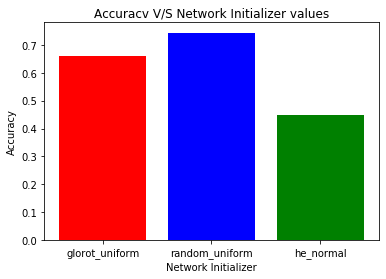

In [128]:
x = ['glorot_uniform','random_uniform','he_normal'] 
# corresponding y axis values 
y = [0.660,0.744,0.448]  
# plotting the points  
plt.bar(x,y,width = 0.8, color = ['red', 'blue','green']) 
# naming the x axis 
plt.xlabel('Network Initializer') 
# naming the y axis 
plt.ylabel('Accuracy') 
  
plt.title('Accuracv V/S Network Initializer values') 
  
# function to show the plot 
plt.show() 

### Conclusion:
### 1) The Deep Learning models of the Convolution Neural Network(CNN) and the Artificial Neural network (ANN) were implemetned on the Hand Sign Image data set;
### 2) The different parameters involved while designing a Deep Learning model were understood and the values were altered accordingly to see the accuracy;
### 3) The Base models of the Convolutional Neural Network and the Artificial Neural Network both had almost the same accuracy
### 4) The concept of network plateau was explored and the paraemters of the model were varied in order to see their accuracy with the model having the newtork plateau
### 5)It was also observed that some models outperformed and some models were below the base model in both CNN and ANN in terms of the accuracy when the parameters were altered


### Contributions
### Percentage of code contributed individually: 60%
### Percentage of code borrowed from external sources: 40%


### Citations:
### The sources majorly used for the project are as follows:
### 1)https://www.kaggle.com/lbronchal/cnn-with-different-seeds-accuracy-99 
### 2)https://keras.io/initializers/
### 3)https://github.com/nikbearbrown/Deep_Learning
### 4)https://www.kaggle.com/ardamavi/sign-language-digits-dataset/kernels

### License:
### Copyright 2020 Samartha Swaroop Girish

### Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

### The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

### THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

### Fin.